# Capstone Project - Predicting Charter Booking Cancellation

## Data Load and Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv('data/capstone_data.csv')

In [3]:
df.head()

,Booking ID,Booking Date,Trip Start Date,Trip End Date,Lead Time,Aircraft_hash,Trip Type,Origin,Aircraft Type,Manufacturer,Size,Customer_hash,Price,Salesperson_hash,Flight Time,Flight Distance,Passengers,Itinerary,Starting ICAO,Ending ICAO,Customer Segment,Trip Class,Trip Category,Status
0,ENTEQ6,10/21/2022,11/6/2022,11/10/2022,15.00,6a0c7aa40319afd851873298f9427de53587ad795e9f2b...,Charter | 135,EMAIL,Hawker 900XP,Beechcraft,Mid-Size,e1d345ac1acd0fb007ddfd8cc553484081e02166892c70...,85227.33,26a09284d375ce135afdc120f87fdfeb8a9f6c34896927...,14.08,5320.00,1.00,KTIW/KPSP/CYYZ/KPSP/KTIW,KTIW,KTIW,New Retail,One way trip,International,Booked
1,UZSAB,5/25/2022,6/13/2022,6/15/2022,19.00,6a0c7aa40319afd851873298f9427de53587ad795e9f2b...,Charter | 135,EMAIL,Hawker 900XP,Beechcraft,Mid-Size,ea3f07fe0ea4d8bf122af6fc83c63eac7c2f2bc9c39c55...,52409.00,b53d8f4d7c9bf9814f243122f72a558f4b96cea9692924...,8.85,3300.00,1.00,KTIW/KPSC/KHOU/KPSC/KTIW,KTIW,KTIW,Wholesale,One way trip,Domestic,Booked
2,MOEFJ1,1/20/2023,2/8/2023,2/8/2023,18.00,6a0c7aa40319afd851873298f9427de53587ad795e9f2b...,Charter | 135,EMAIL,Hawker 900XP,Beechcraft,Mid-Size,c5d957280d38430652f2ba6ce426c913d4e88e1ea71a24...,31495.00,8009e22925d6e90622a77c154794cf2dfc2f6f5c4b0f9d...,4.98,1734.00,2.00,KTIW/KPSP/KBFI/KTIW,KTIW,KTIW,New Retail,One way trip,Domestic,Booked
3,WEDUN3,11/23/2021,2/23/2022,2/27/2022,91.00,6a0c7aa40319afd851873298f9427de53587ad795e9f2b...,Charter | 135,EMAIL,Hawker 900XP,Beechcraft,Mid-Size,839db22a18bd8265fa65973408cc164e9d9a2e73515fe9...,59581.00,8009e22925d6e90622a77c154794cf2dfc2f6f5c4b0f9d...,8.62,3216.00,5.00,KTIW/KSNA/MMSD/KSDM/KSNA/KTIW,KTIW,KTIW,New Retail,One way trip,International,Booked
4,WEDUN5,11/4/2021,2/23/2022,2/28/2022,111.00,6a0c7aa40319afd851873298f9427de53587ad795e9f2b...,Charter | 135,EMAIL,Hawker 900XP,Beechcraft,Mid-Size,839db22a18bd8265fa65973408cc164e9d9a2e73515fe9...,59581.00,8009e22925d6e90622a77c154794cf2dfc2f6f5c4b0f9d...,0.00,3216.00,5.00,NaN,NaN,NaN,New Retail,One way trip,International,Cancelled


In [4]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 8353 rows and 24 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8353 entries, 0 to 8352
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Booking ID        8353 non-null   object 
 1   Booking Date      8353 non-null   object 
 2   Trip Start Date   8336 non-null   object 
 3   Trip End Date     8336 non-null   object 
 4   Lead Time         8336 non-null   float64
 5   Aircraft_hash     8353 non-null   object 
 6   Trip Type         8353 non-null   object 
 7   Origin            8353 non-null   object 
 8   Aircraft Type     8353 non-null   object 
 9   Manufacturer      8353 non-null   object 
 10  Size              8353 non-null   object 
 11  Customer_hash     8353 non-null   object 
 12  Price             8353 non-null   float64
 13  Salesperson_hash  8353 non-null   object 
 14  Flight Time       8336 non-null   float64
 15  Flight Distance   8336 non-null   float64
 16  Passengers        8336 non-null   float64


In [6]:
date_cols = ['Booking Date','Trip Start Date','Trip End Date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col])

In [7]:
df[['Booking Date','Trip Start Date','Trip End Date']].dtypes

Booking Date       datetime64[ns]
Trip Start Date    datetime64[ns]
Trip End Date      datetime64[ns]
dtype: object

In [8]:
df['Booking Year'] = df['Booking Date'].dt.year
df['Trip Start Year'] = df['Trip Start Date'].dt.year
df['Trip Start Month'] = df['Trip Start Date'].dt.month_name()
df['Trip Start Day'] = df['Trip Start Date'].dt.day_name()
df.sample(5)

,Booking ID,Booking Date,Trip Start Date,Trip End Date,Lead Time,Aircraft_hash,Trip Type,Origin,Aircraft Type,Manufacturer,Size,Customer_hash,Price,Salesperson_hash,Flight Time,Flight Distance,Passengers,Itinerary,Starting ICAO,Ending ICAO,Customer Segment,Trip Class,Trip Category,Status,Booking Year,Trip Start Year,Trip Start Month,Trip Start Day
2516,BUZON,2022-08-02,2022-09-19,2022-09-22,47.00,617a5af44e5f7e39b676cdefe520c06a7893859b7de320...,Charter | 135,EMAIL,Gulfstream IV,Gulfstream,Large,e817503fb04ef6560f770e8cb2ae858bbc98e5d24989c5...,87560.00,97889ba44345174cfa08d75ac8d0f21b042a64d732e6f0...,0.00,4316.00,13.00,NaN,NaN,NaN,Key Account,Roundtrip,Domestic,Cancelled,2022,2022.00,September,Monday
8257,FEEST7,2021-12-13,2021-12-15,2021-12-15,2.00,27e2095b01d8d58859c9c2989cba08fca85c9785b74c88...,Charter | 135,DISPATCH,Gulfstream IV,Gulfstream,Large,8a06e5e5a00aa82bd1d346e5ddf41a0eee78097d54d4f5...,21974.00,73203cc3292a916e603f3321f421d7f01e665699b91e0b...,0.00,1182.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,Cancelled,2021,2021.00,December,Wednesday
5511,SUBEG,2024-07-23,2024-07-31,2024-07-31,7.00,be73e550f6e50a7531c2722a94469b5dd18d1d95731eb2...,Subcharter | 135,EMAIL,Hawker800XP,Beechcraft,Mid-Size,29fb083d00319a562be993e125e607242e406f99dae311...,17954.00,800ce0193fc9487cb5a13d7efa4e27facf9daf05b94954...,0.63,271.00,2.00,KSTL/KBEH,KSTL,KBEH,Existing Retail,NaN,Domestic,Booked,2024,2024.00,July,Wednesday
4368,XABOO,2021-11-09,2021-11-11,2021-11-14,2.00,82984a56aa56eb1e1951db47e0eb028af8141b33ffb75b...,Subcharter | 135,EMAIL,Challenger 300,Bombardier,Super Mid-Size,5a12f31a277b2e2685b67bf2af2f28e978300d4ed0e7a8...,44750.85,c92ce3c01e4352febbd906e365788edbbdec768e4928b7...,3.90,1416.00,1.00,KVNY/KJAC/KSUN/KVNY,KVNY,KVNY,NaN,NaN,NaN,Booked,2021,2021.00,November,Thursday
7221,OSAXQ3,2021-11-23,2021-11-24,2021-11-25,1.00,4f9c50d37666a9dae59042a1a8865b4ef73c1ce796bff4...,Charter | 135,DISPATCH,Learjet 70,Bombardier,Light,8a06e5e5a00aa82bd1d346e5ddf41a0eee78097d54d4f5...,17169.00,5ffbf8ba71921b90e37678fc08b6123f21b28ce01d4569...,0.00,1585.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,Cancelled,2021,2021.00,November,Wednesday


### Domain Knowledge - Note

Our company switched their flight booking software system in 2021 and all the existing bookings from the previous system were assigned a Booking Date equal to the day the transfer took place. For this reason it looks like there were a lot of bookings in April 2021, but this is not true as it was due to the data transfer from the old system to the new system.

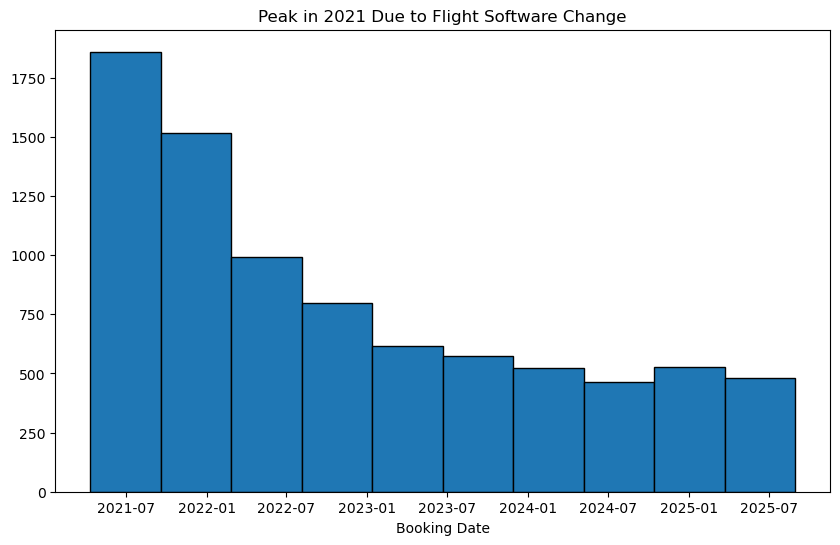

In [9]:
df['Booking Date'].hist(figsize = (10,6), grid = False, edgecolor = 'black')
plt.title('Peak in 2021 Due to Flight Software Change')
plt.xlabel('Booking Date')
plt.show();

In [10]:
df_2021 = df[df['Booking Year'] == 2021]

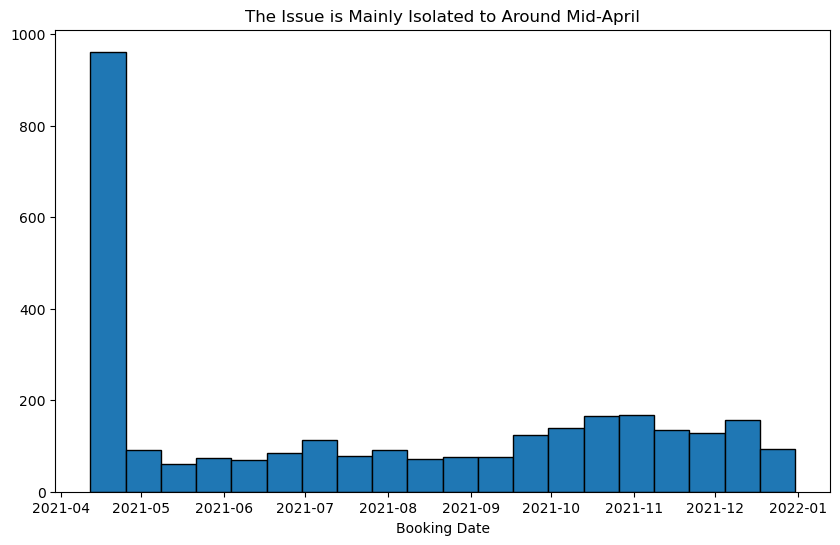

In [11]:
df_2021['Booking Date'].hist(figsize = (10,6), grid = False, bins = 20, edgecolor = 'black')
plt.title('The Issue is Mainly Isolated to Around Mid-April')
plt.xlabel('Booking Date')
plt.show();

In [12]:
df_2021['Booking Date'].value_counts()

Booking Date
2021-04-12    894
2021-11-02     34
2021-07-25     34
2021-09-27     25
2021-10-20     25
             ... 
2021-10-31      1
2021-09-06      1
2021-11-27      1
2021-07-12      1
2021-07-18      1
Name: count, Length: 245, dtype: int64

We can see that all the existing bookings that were transferred over to the new system were assigned a Booking Date of 04/12/2021. I will filter out the 894 rows with this Booking Date to smooth out the data.

In [13]:
df = df[df['Booking Date'] != '2021-04-12']
df.shape[0]

7459

### Check for Duplicates and Missing Values

In [14]:
df.duplicated().sum()

0

In [15]:
df.isna().mean().multiply(100).round(2)

Booking ID          0.00
Booking Date        0.00
Trip Start Date     0.17
Trip End Date       0.17
Lead Time           0.17
Aircraft_hash       0.00
Trip Type           0.00
Origin              0.00
Aircraft Type       0.00
Manufacturer        0.00
Size                0.00
Customer_hash       0.00
Price               0.00
Salesperson_hash    0.00
Flight Time         0.17
Flight Distance     0.17
Passengers          0.17
Itinerary          19.75
Starting ICAO      19.75
Ending ICAO        19.75
Customer Segment   30.85
Trip Class         44.30
Trip Category      26.41
Status              0.00
Booking Year        0.00
Trip Start Year     0.17
Trip Start Month    0.17
Trip Start Day      0.17
dtype: float64

In [16]:
df['Trip Class'].unique().tolist()

['One way trip', nan, 'Roundtrip']

In [17]:
df.groupby('Booking Year')['Trip Class'].value_counts(dropna = False)

Booking Year  Trip Class  
2021          NaN             1956
              Roundtrip         55
              One way trip      51
2022          Roundtrip       1050
              One way trip     612
              NaN              498
2023          Roundtrip        740
              One way trip     331
              NaN              293
2024          Roundtrip        561
              NaN              293
              One way trip     266
2025          Roundtrip        310
              NaN              264
              One way trip     179
Name: count, dtype: int64

In [18]:
df['Customer Segment'].unique().tolist()

['New Retail', 'Wholesale', 'Key Account', nan, 'Existing Retail', 'Owner']

In [19]:
df.groupby('Booking Year')['Customer Segment'].value_counts(dropna = False)

Booking Year  Customer Segment
2021          NaN                 1957
              Key Account           38
              New Retail            25
              Wholesale             24
              Existing Retail       17
              Owner                  1
2022          Key Account          819
              New Retail           513
              Wholesale            419
              NaN                  157
              Existing Retail      150
              Owner                102
2023          Key Account          377
              New Retail           375
              Wholesale            353
              Existing Retail      100
              NaN                   80
              Owner                 79
2024          New Retail           317
              Key Account          303
              Wholesale            235
              Owner                111
              Existing Retail      103
              NaN                   51
2025          Key Account        

In [20]:
df['Trip Category'].unique().tolist()

['International', 'Domestic', nan]

In [21]:
df.groupby('Booking Year')['Trip Category'].value_counts(dropna = False)

Booking Year  Trip Category
2021          NaN              1945
              Domestic           97
              International      20
2022          Domestic         1815
              International     334
              NaN                11
2023          Domestic         1165
              International     195
              NaN                 4
2024          Domestic          929
              International     189
              NaN                 2
2025          Domestic          616
              International     129
              NaN                 8
Name: count, dtype: int64

As we can see most of the missing values occur in Booking Year 2021 for the columns with a high percent of missing values. Since the percent of missing values is quite high in these columns and we don't have a ton of data, we will want to try imputing these missing values later on after the train test split.

## EDA (Exploratory Data Analysis)

### Numerical Features

In [22]:
df.describe(include = ['int', 'float'], exclude = ['datetime64']).round(1)

,Lead Time,Price,Flight Time,Flight Distance,Passengers,Booking Year,Trip Start Year
count,7446.00,7459.00,7446.00,7446.00,7446.00,7459.00,7446.00
mean,21.90,131891.30,4.30,2697.40,5.60,2022.50,2022.60
std,179.70,6045435.20,4.70,2262.80,4.50,1.30,1.40
min,-1274.00,-553368.70,-0.00,0.00,0.00,2021.00,2020.00
25%,2.00,26176.00,0.00,1102.50,2.00,2021.00,2021.00
50%,8.00,45767.00,3.20,2166.00,5.00,2022.00,2022.00
75%,25.00,77547.50,6.80,4053.80,8.00,2024.00,2024.00
max,10602.00,522146228.00,63.70,27123.00,120.00,2025.00,2050.00


I can see that there are some outliers or (more likely) incorrect values in some of the columns, so let's investigate and clean these up.

In [23]:
df.loc[(df['Lead Time'] == 10602) | (df['Price'] == 522146228)]

,Booking ID,Booking Date,Trip Start Date,Trip End Date,Lead Time,Aircraft_hash,Trip Type,Origin,Aircraft Type,Manufacturer,Size,Customer_hash,Price,Salesperson_hash,Flight Time,Flight Distance,Passengers,Itinerary,Starting ICAO,Ending ICAO,Customer Segment,Trip Class,Trip Category,Status,Booking Year,Trip Start Year,Trip Start Month,Trip Start Day
34,LUORW1,2021-06-25,2050-07-05,2050-07-07,10602.00,8ee4cc6d5f371dbec54773ed69e8749f709a112c89b6fa...,Charter | 135,EMAIL,Global 6000,Bombardier,Large,028305ea65acec2d365db21402c4878aad2c7b4491b614...,85410.09,8c9637d84bc01e77334d1fb69fca188d34fc46ea46f811...,9.73,4274.00,13.00,KASE/KTEB/KLAX/KASE,KASE,KASE,Wholesale,One way trip,Domestic,Booked,2021,2050.00,July,Tuesday
3510,ZIVUK,2021-06-16,2021-06-18,2021-06-21,1.00,4f9c50d37666a9dae59042a1a8865b4ef73c1ce796bff4...,Charter | 135,EMAIL,Learjet 70,Bombardier,Light,cbbcdb35375ea58fb03d28a729e8f2890c7e661be42ddd...,522146228.00,97889ba44345174cfa08d75ac8d0f21b042a64d732e6f0...,3.73,1284.00,3.00,KVNY/KSKX/KBUR/KVNY,KVNY,KVNY,NaN,NaN,NaN,Booked,2021,2021.00,June,Friday
7438,LUORW,2021-06-25,2050-07-05,2050-07-07,10602.00,8ee4cc6d5f371dbec54773ed69e8749f709a112c89b6fa...,Charter | 135,EMAIL,Global 6000,Bombardier,Large,028305ea65acec2d365db21402c4878aad2c7b4491b614...,85803.00,8c9637d84bc01e77334d1fb69fca188d34fc46ea46f811...,0.00,5055.00,13.00,NaN,NaN,NaN,NaN,Roundtrip,Domestic,Cancelled,2021,2050.00,July,Tuesday


These are definitely incorrect as we wouldn't have a trip start date in 2050 (lead time of 10,602 days) and it would never cost $522 million for a charter trip. We will remove these 3 rows from the dataset.

In [24]:
df = df.loc[(df['Lead Time'] != 10602) & (df['Price'] != 522146228)]

In [25]:
df.sort_values(by = 'Passengers', ascending = False).head()

,Booking ID,Booking Date,Trip Start Date,Trip End Date,Lead Time,Aircraft_hash,Trip Type,Origin,Aircraft Type,Manufacturer,Size,Customer_hash,Price,Salesperson_hash,Flight Time,Flight Distance,Passengers,Itinerary,Starting ICAO,Ending ICAO,Customer Segment,Trip Class,Trip Category,Status,Booking Year,Trip Start Year,Trip Start Month,Trip Start Day
5837,CETOF,2025-05-02,2025-05-03,2025-05-04,1.00,99081cfa67d16250aa03dcc85db751d7156d3691f8b33d...,Subcharter | 135,EMAIL,Boeing 737-800,Boeing,Large,3e1ea77686b900731aac18a547d1a85c5c39d05e4414dd...,138600.00,800ce0193fc9487cb5a13d7efa4e27facf9daf05b94954...,3.82,1496.00,120.00,KLAX/KDEN/KLAX,KLAX,KLAX,New Retail,NaN,Domestic,Booked,2025,2025.00,May,Saturday
1345,BUUDC,2023-08-31,2023-09-27,2023-10-24,27.00,59a2b2a65abb1aa9a56c2922beb36745e49e5c28dfbd7d...,Subcharter | 135,EMAIL,Airbus A320,Airbus,Large,f97c2e08893045ce13495e2defeb9f8b41d39bdebff0c9...,1276760.00,800ce0193fc9487cb5a13d7efa4e27facf9daf05b94954...,30.90,10971.00,100.00,MMMY/MMTO/SKBO/SBGL/SBGR/SCEL/SAEZ/SPJC/MMGL,MMMY,MMGL,New Retail,NaN,International,Booked,2023,2023.00,September,Wednesday
4412,UBVOV,2023-08-17,2024-05-02,2024-05-06,259.00,8ea8064e2f3770a57b7fcbbefbba70865f5ca18e2371f8...,Subcharter | 135,EMAIL,Embraer E190,Embraer,Large,63e26410edbce3c4d4e8b418e3ad7f12a6238a62d9efc2...,84284.00,a69a25607d9f39b06e53c7a967ce90283bc96251707871...,2.95,1063.00,94.00,KLAX/KPVU/KLAX,KLAX,KLAX,New Retail,NaN,Domestic,Booked,2023,2024.00,May,Thursday
1835,LIFAV,2024-10-21,2025-02-20,2025-02-23,122.00,f5e548c5a693607f17fdc090452e174792b12474a449c9...,Subcharter | 135,EMAIL,Boeing 757-200,Boeing,Large,00b85fad8da751cffc8939773db6a82bd4e0ffe0edeab9...,434721.00,b53d8f4d7c9bf9814f243122f72a558f4b96cea9692924...,5.52,2282.00,62.00,KORD/MYNN/KORD,KORD,KORD,New Retail,NaN,International,Booked,2024,2025.00,February,Thursday
7796,OQBUL2,2022-03-14,2022-07-09,2022-07-17,116.00,3232020e65a5cead3773937884d300e8ffe76c7aee4426...,Subcharter | 135,EMAIL,Boeing 757-200,Boeing,Large,55b1a929774bb93e5e76391893a50b75a9ff538af21d22...,559000.00,c43237bab3363d2fdac6698a860029282220ba6b6a9a69...,0.00,6822.00,60.00,NaN,NaN,NaN,New Retail,NaN,International,Cancelled,2022,2022.00,July,Saturday


Although it's rare, there are occassionally charter trips with 100+ passengers and we can see the aircraft type was a Boeing 737 and an Airbus A320 which can seat 100+ passengers, so these outliers are legitimate.

In [26]:
df.sort_values(by = 'Flight Time', ascending = False).head()

,Booking ID,Booking Date,Trip Start Date,Trip End Date,Lead Time,Aircraft_hash,Trip Type,Origin,Aircraft Type,Manufacturer,Size,Customer_hash,Price,Salesperson_hash,Flight Time,Flight Distance,Passengers,Itinerary,Starting ICAO,Ending ICAO,Customer Segment,Trip Class,Trip Category,Status,Booking Year,Trip Start Year,Trip Start Month,Trip Start Day
3476,EHAKQ8,2022-12-23,2023-01-11,2023-02-12,18.00,7525745cee5bc8f364e98f1c0778476bd6a617a7e9213c...,Charter | 135,EMAIL,Citation X,Cessna,Super Mid-Size,dd93ab5cf862e219f42f000b2e3beb633e6cef7f4e9862...,544960.00,ee161b1189d06b4fc6df8c02df6fcbe3630da808e97e89...,63.67,25938.00,4.00,KBFI/KVNY/MROC/SEQM/SEST/SEGU/KBRO/KBFI/KBRO/S...,KBFI,KBFI,New Retail,Roundtrip,International,Booked,2022,2023.00,January,Wednesday
5301,CECUX5,2024-05-01,2024-05-27,2024-07-31,26.00,7b86c434474e71971cacd681bcb5b654cdcd1ae556c89e...,Subcharter | 135,EMAIL,CRJ-200,Bombardier,Large,29fb083d00319a562be993e125e607242e406f99dae311...,1003041.52,800ce0193fc9487cb5a13d7efa4e27facf9daf05b94954...,48.97,17111.00,14.00,KCMA/KPDX/KEPH/KVNY/KMYV/KVNY/KSLC/KSAF/KABQ/K...,KCMA,KVNY,Existing Retail,NaN,International,Booked,2024,2024.00,May,Monday
6061,MERAO,2025-06-16,2025-11-05,2025-11-30,142.00,3d342caf3e39f8c259e9e9eaa40f7e2fa96320da8c3ebf...,Subcharter | 135,EMAIL,Global 6000,Bombardier,Large,6ad0839296f44f7820a1afb5d10bfdeac8fd21eba13947...,700200.00,8c9637d84bc01e77334d1fb69fca188d34fc46ea46f811...,44.98,20353.00,2.00,LHBP/KPVD/KTEB/KLAX/PHLI/PHNL/NTAA/KSAT/LHBP,LHBP,LHBP,Key Account,NaN,International,Booked,2025,2025.00,November,Wednesday
5997,EJTIX,2025-06-27,2025-12-18,2026-01-04,174.00,ab1d1938bb800c533a325857ffdfebc1fe757775745252...,Charter | 135,EMAIL,Global 5000GVFD,Bombardier,Large,6ad0839296f44f7820a1afb5d10bfdeac8fd21eba13947...,539893.20,8c9637d84bc01e77334d1fb69fca188d34fc46ea46f811...,43.40,23198.00,6.00,KOXC/LHBP/KPVD/KTEB/KSAT/LHBP/EDNY/LHBP/KOXC,KOXC,KOXC,Key Account,Roundtrip,International,Booked,2025,2025.00,December,Thursday
1590,HOVEQ,2024-11-20,2024-12-17,2024-12-29,27.00,ab1d1938bb800c533a325857ffdfebc1fe757775745252...,Charter | 135,EMAIL,Global 5000GVFD,Bombardier,Large,6ad0839296f44f7820a1afb5d10bfdeac8fd21eba13947...,508557.00,8c9637d84bc01e77334d1fb69fca188d34fc46ea46f811...,41.87,18367.00,4.00,KOXC/LHBP/KPVD/KTEB/KSAT/LHBP/TBPB,KOXC,TBPB,Key Account,One way trip,International,Booked,2024,2024.00,December,Tuesday


Similarly, the trips with very long flight times are also legitimate since they were multi-leg international trips.

In [27]:
df['Price'].loc[df['Price'] < 0].count() + df['Lead Time'].loc[df['Lead Time'] < 0].count()

109

We should never have negative prices or lead times, so we'll drop these 109 rows.

In [28]:
df = df.loc[(df['Price'] >= 0) & (df['Lead Time'] >= 0 )]

In [29]:
df.reset_index(drop = True, inplace = True)

In [30]:
df.describe(include = ['int', 'float'], exclude = ['datetime64']).round(1)

,Lead Time,Price,Flight Time,Flight Distance,Passengers,Booking Year,Trip Start Year
count,7334.00,7334.00,7334.00,7334.00,7334.00,7334.00,7334.00
mean,21.20,62172.00,4.30,2701.80,5.60,2022.50,2022.60
std,35.00,67390.50,4.70,2262.30,4.50,1.30,1.30
min,0.00,0.00,-0.00,0.00,0.00,2021.00,2021.00
25%,2.00,26450.30,0.00,1106.00,2.00,2021.00,2021.00
50%,8.00,45995.40,3.20,2166.00,5.00,2022.00,2022.00
75%,25.00,77622.80,6.90,4059.80,8.00,2024.00,2024.00
max,394.00,1276760.00,63.70,27123.00,120.00,2025.00,2025.00


In [31]:
num_features = df.select_dtypes(['int', 'float'])

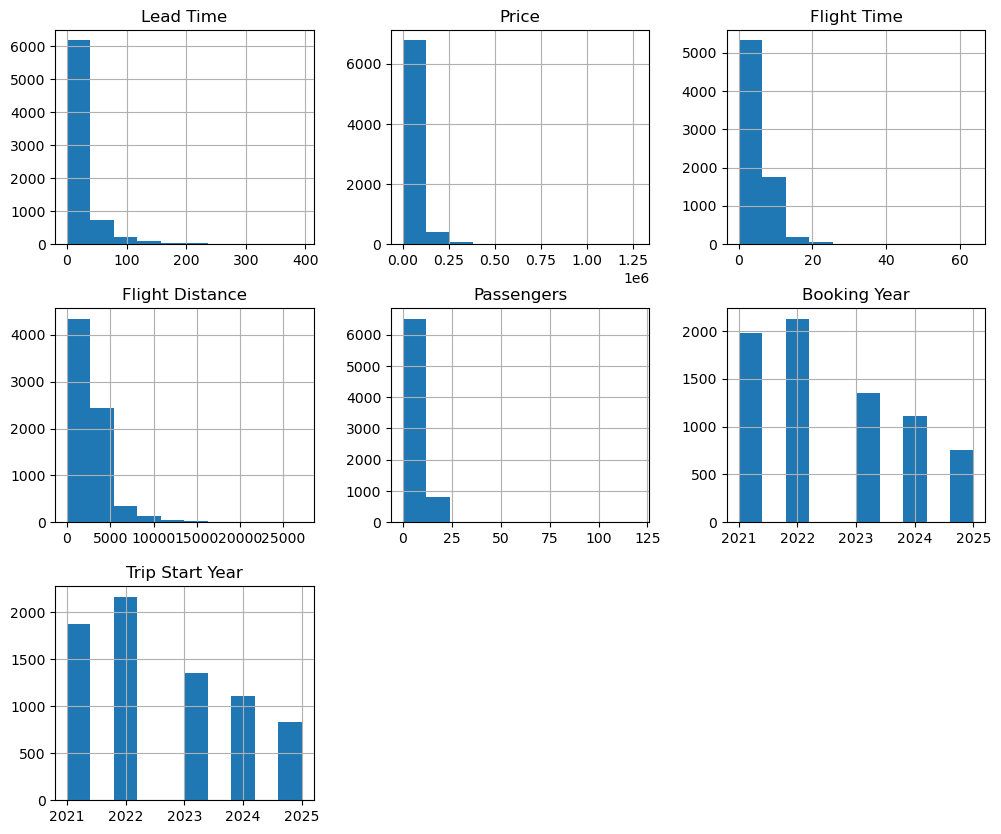

In [32]:
num_features.hist(figsize = (12,10));

### Categorical Features

In [33]:
df.describe(include = ['object'])

,Booking ID,Aircraft_hash,Trip Type,Origin,Aircraft Type,Manufacturer,Size,Customer_hash,Salesperson_hash,Itinerary,Starting ICAO,Ending ICAO,Customer Segment,Trip Class,Trip Category,Status,Trip Start Month,Trip Start Day
count,7334,7334,7334,7334,7334,7334,7334,7334,7334,5925,5925,5925,5126,4133,5451,7334,7334,7334
unique,7331,885,2,5,156,16,4,1698,59,3822,356,371,5,2,2,2,12,7
top,DUGUK,754390e6cfa50107fd87c3ea9dd3404cfc9ddc369cf1ae...,Charter | 135,EMAIL,Gulfstream IV,Gulfstream,Large,e817503fb04ef6560f770e8cb2ae858bbc98e5d24989c5...,97889ba44345174cfa08d75ac8d0f21b042a64d732e6f0...,KVNY/KLAS/KVNY,KVNY,KVNY,Key Account,Roundtrip,Domestic,Booked,December,Friday
freq,2,269,5552,6405,700,2163,3596,236,1066,137,2975,2954,1750,2703,4588,5247,778,1145


In [34]:
cat_features = df.select_dtypes('object')
cat_plot_features = cat_features.loc[:, cat_features.nunique() <= 20]

I don't want to plot the categorical features with a high number of unique values as the axes will not be legible and the cell will take a lont time to run, so I'm limiting it to the categorical features with a maximum of 20 unique values.

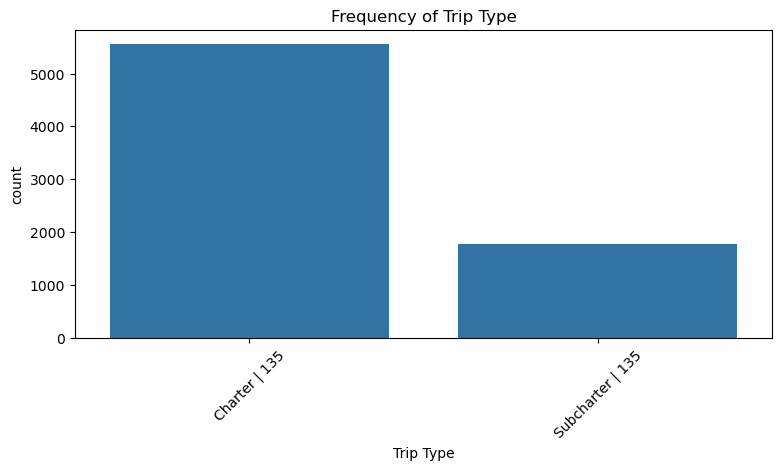

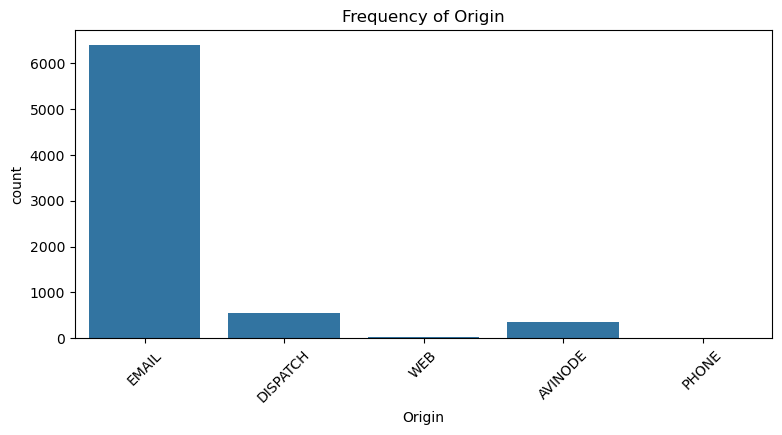

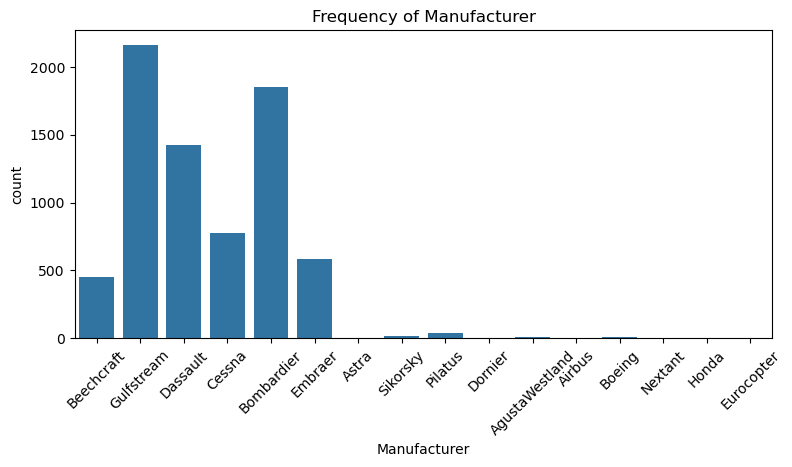

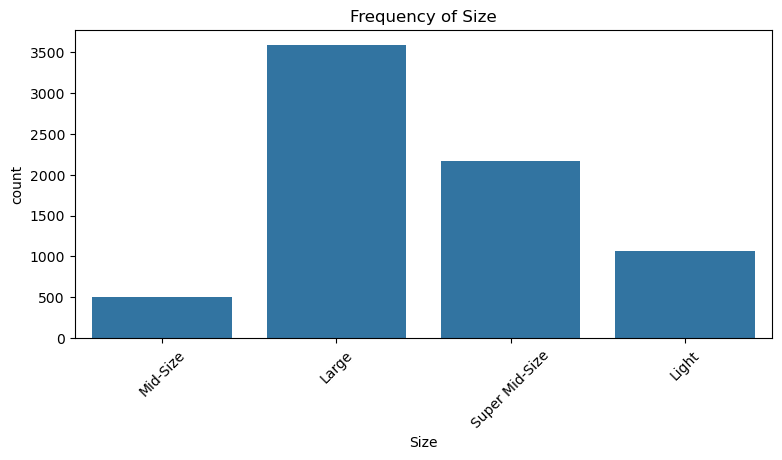

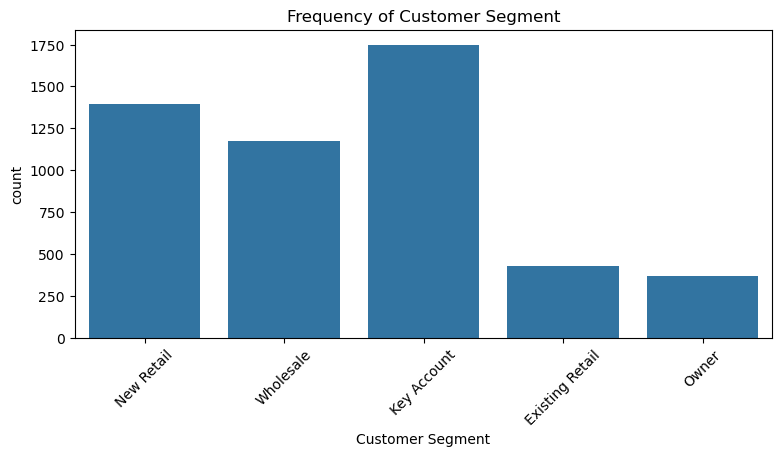

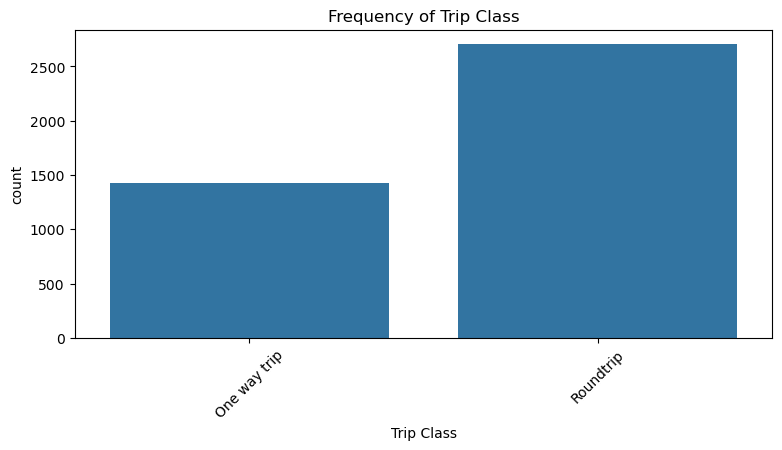

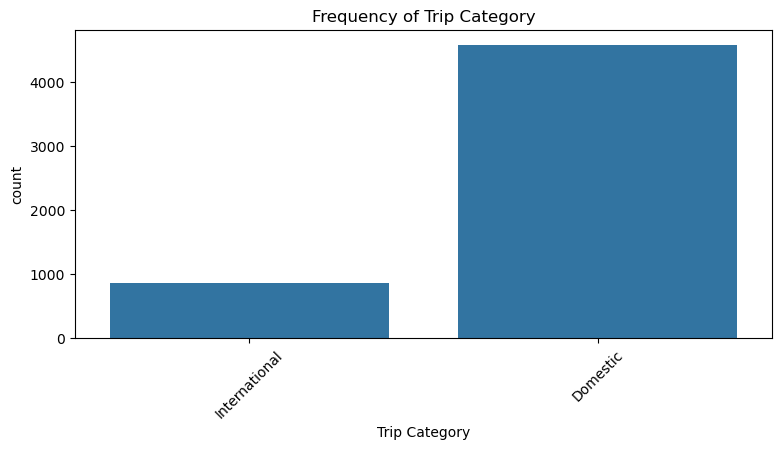

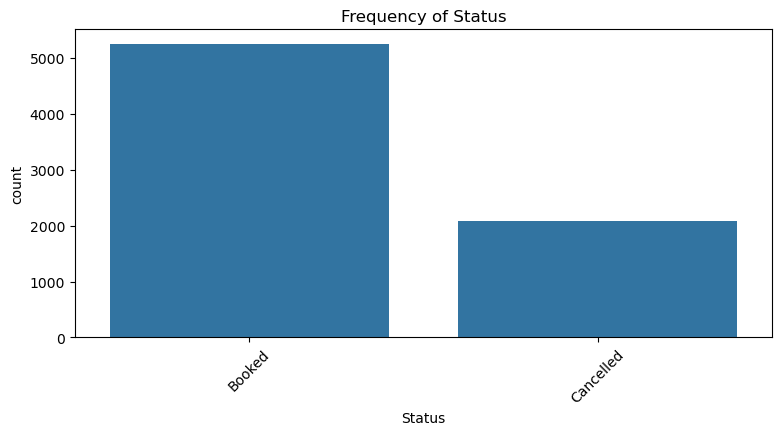

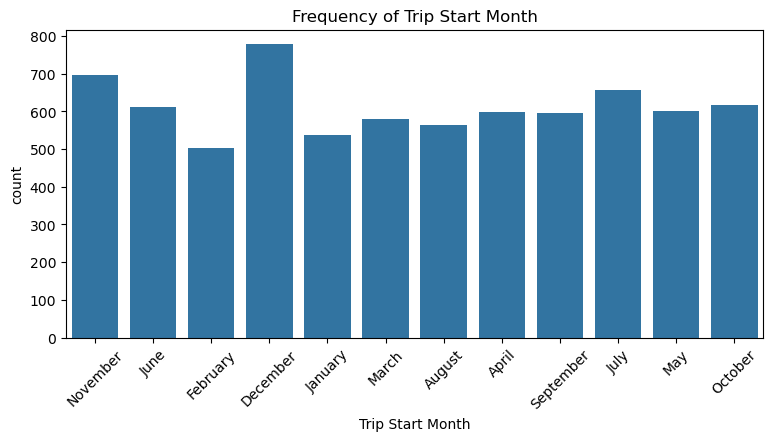

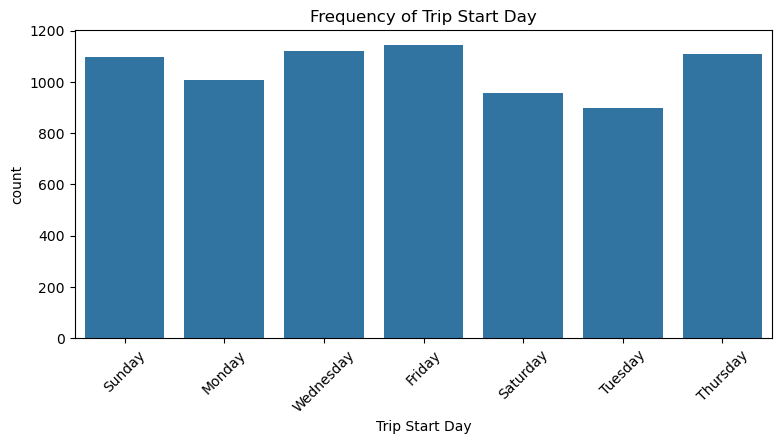

In [35]:
for cat in cat_plot_features.columns:
    plt.figure(figsize = (9,4))
    sns.countplot(data=df, x=cat)
    plt.title(f"Frequency of {cat}")
    plt.xticks(rotation=45)
    plt.show()

In [36]:
# Group all the manufacturers with few instances into "Other" category
main_manufacturers = ['Gulfstream', 'Bombardier', 'Dassault', 'Cessna', 'Embraer', 'Beechcraft']
df.loc[~df['Manufacturer'].isin(main_manufacturers), 'Manufacturer'] = 'Other'

In [37]:
df['Manufacturer'].value_counts()

Manufacturer
Gulfstream    2163
Bombardier    1850
Dassault      1426
Cessna         774
Embraer        587
Beechcraft     453
Other           81
Name: count, dtype: int64

### Univariate Analysis

In [38]:
df['Status'].value_counts(normalize = True).round(2)

Status
Booked      0.72
Cancelled   0.28
Name: proportion, dtype: float64

The target variable's classes are imbalanced, but it is not too severe.

In [39]:
# Convert target variable classes to 0 and 1 for better analysis
df['Status'] = df['Status'].replace({'Booked': 0, 'Cancelled': 1})

In [40]:
df['Status'].mean()

0.28456503954185985

The average cancellation rate for our dataset is 28.5%

### Bivariate Analysis

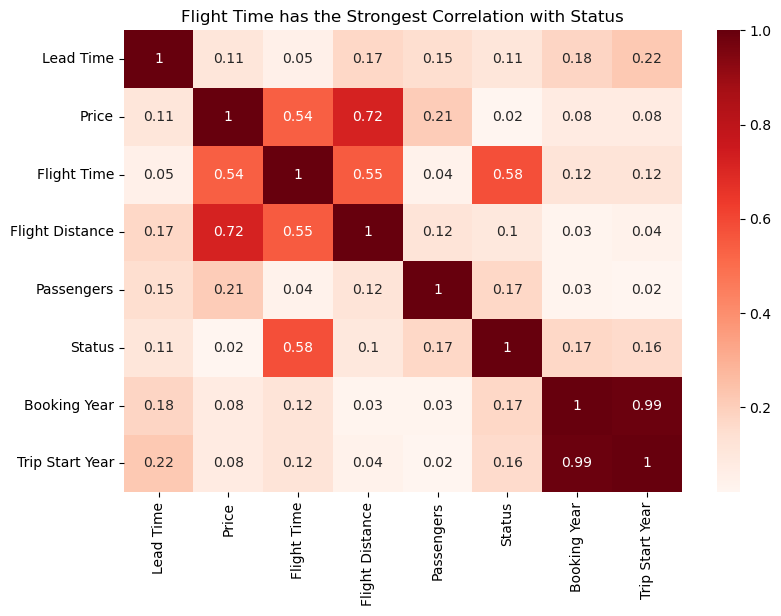

In [41]:
plt.figure(figsize = (9, 6))
sns.heatmap(df.corr(numeric_only = True).abs().round(2), annot = True, cmap = 'Reds')
plt.title('Flight Time has the Strongest Correlation with Status');

In [42]:
df.groupby('Status')['Flight Distance'].mean()

Status
0   2564.36
1   3047.45
Name: Flight Distance, dtype: float64

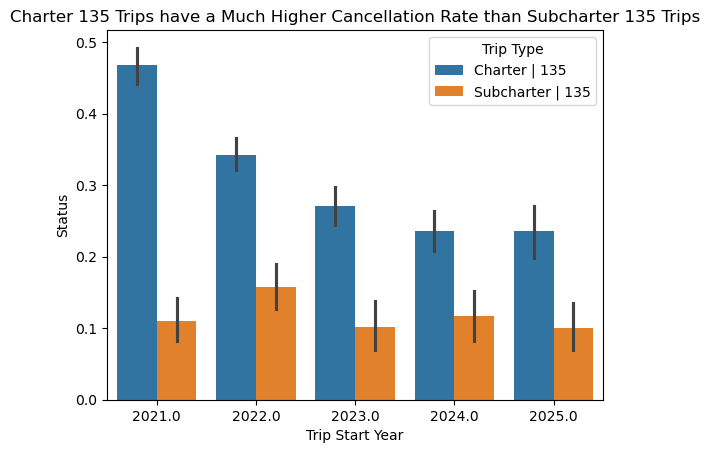

In [43]:
sns.barplot(data = df, x = 'Trip Start Year', y = 'Status', hue = 'Trip Type')
plt.title('Charter 135 Trips have a Much Higher Cancellation Rate than Subcharter 135 Trips');

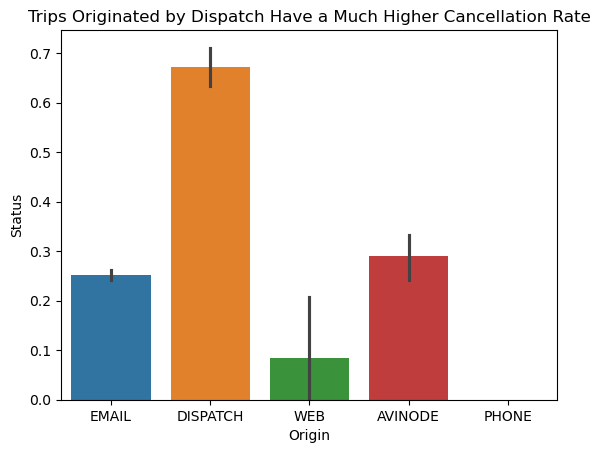

In [44]:
sns.barplot(data = df, x = 'Origin', y = 'Status', hue = 'Origin')
plt.title('Trips Originated by Dispatch Have a Much Higher Cancellation Rate');

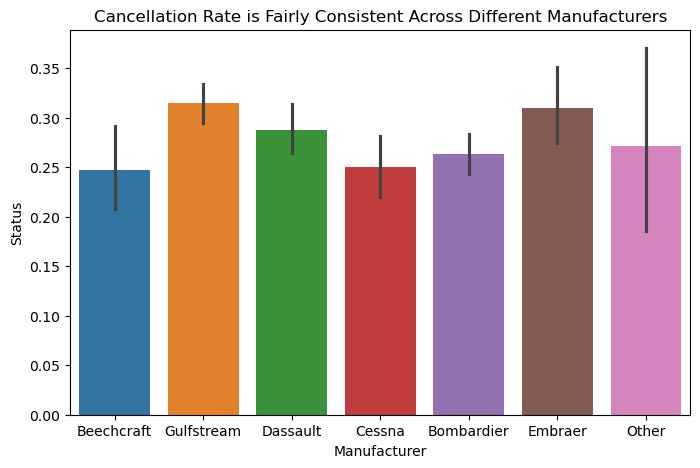

In [45]:
plt.figure(figsize = (8,5))
sns.barplot(data = df, x = 'Manufacturer', y = 'Status', hue = 'Manufacturer')
plt.title('Cancellation Rate is Fairly Consistent Across Different Manufacturers')
plt.show();

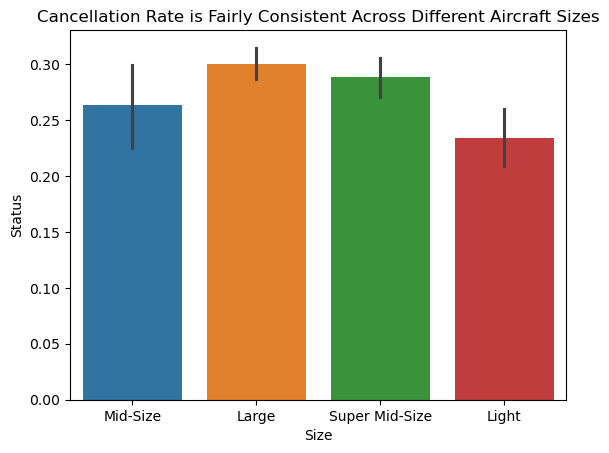

In [46]:
sns.barplot(data = df, x = 'Size', y = 'Status', hue = 'Size')
plt.title('Cancellation Rate is Fairly Consistent Across Different Aircraft Sizes');

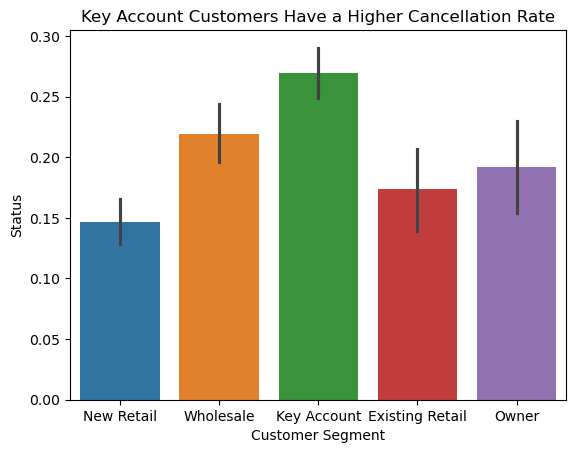

In [47]:
sns.barplot(data = df, x = 'Customer Segment', y = 'Status', hue = 'Customer Segment', legend = False)
plt.title('Key Account Customers Have a Higher Cancellation Rate');

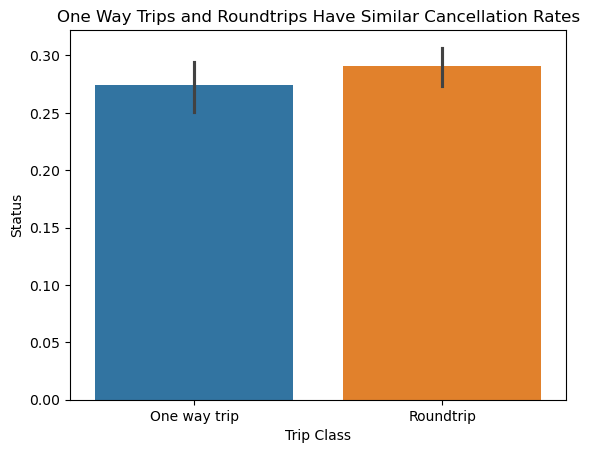

In [48]:
sns.barplot(data = df, x = 'Trip Class', y = 'Status', hue = 'Trip Class', legend = False)
plt.title('One Way Trips and Roundtrips Have Similar Cancellation Rates');

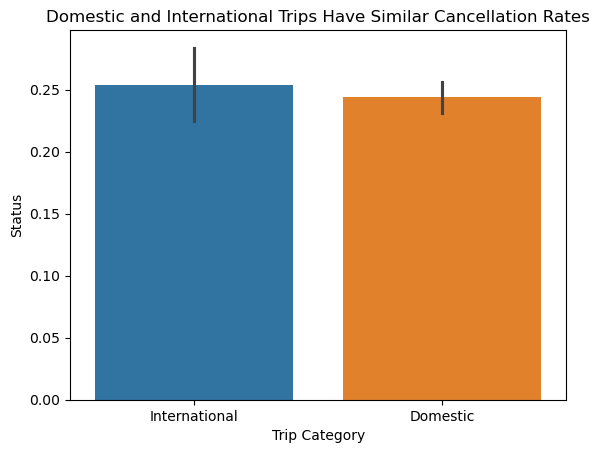

In [49]:
sns.barplot(data = df, x = 'Trip Category', y = 'Status', hue = 'Trip Category', legend = False)
plt.title('Domestic and International Trips Have Similar Cancellation Rates');

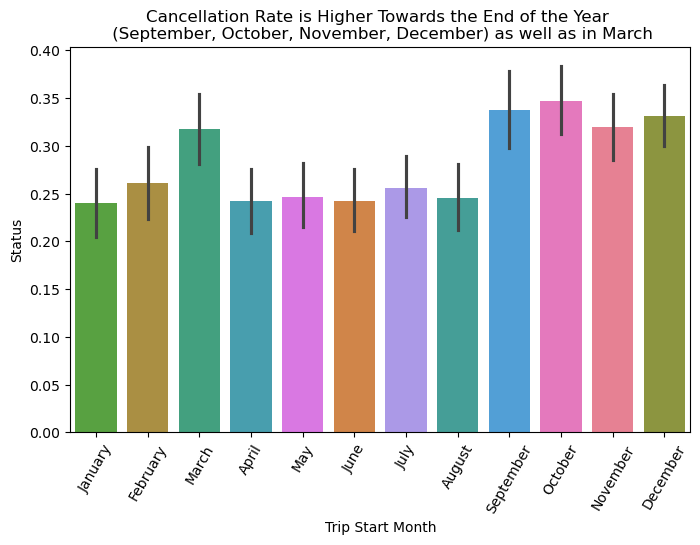

In [50]:
plt.figure(figsize = (8,5))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(data = df, x = 'Trip Start Month', y = 'Status', hue = 'Trip Start Month', legend = False, order = month_order)
plt.xticks(rotation = 60)
plt.title('Cancellation Rate is Higher Towards the End of the Year \n (September, October, November, December) as well as in March')
plt.show();

In [51]:
df.groupby('Trip Start Month')['Status'].agg(['mean','count']).round(2).sort_values(by = 'mean', ascending = False)

,mean,count
Trip Start Month,,
October,0.35,617
September,0.34,595
December,0.33,778
March,0.32,579
November,0.32,697
February,0.26,502
July,0.26,656
August,0.25,563
May,0.25,600


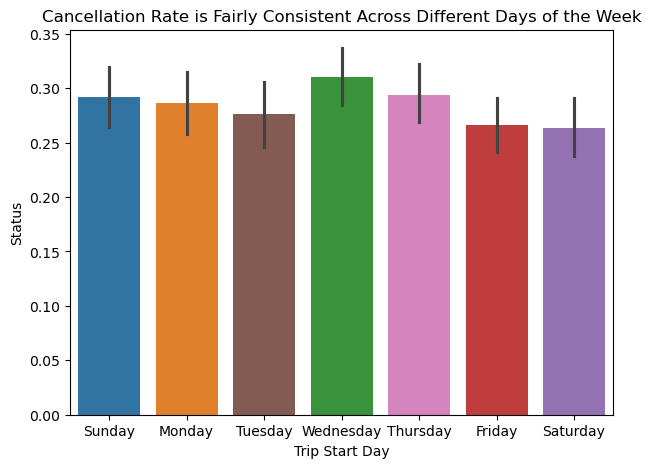

In [52]:
plt.figure(figsize = (7,5))
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sns.barplot(data = df, x = 'Trip Start Day', y = 'Status', hue = 'Trip Start Day', legend = False, order = day_order)
plt.title('Cancellation Rate is Fairly Consistent Across Different Days of the Week')
plt.show();

In [53]:
df.columns

Index(['Booking ID', 'Booking Date', 'Trip Start Date', 'Trip End Date',
       'Lead Time', 'Aircraft_hash', 'Trip Type', 'Origin', 'Aircraft Type',
       'Manufacturer', 'Size', 'Customer_hash', 'Price', 'Salesperson_hash',
       'Flight Time', 'Flight Distance', 'Passengers', 'Itinerary',
       'Starting ICAO', 'Ending ICAO', 'Customer Segment', 'Trip Class',
       'Trip Category', 'Status', 'Booking Year', 'Trip Start Year',
       'Trip Start Month', 'Trip Start Day'],
      dtype='object')

In [54]:
df.drop(columns = ['Booking ID', 'Booking Date', 'Trip Start Date', 'Trip End Date', 'Aircraft_hash', 'Aircraft Type', 'Customer_hash', 'Salesperson_hash', 'Flight Time', 'Itinerary', 'Starting ICAO', 'Ending ICAO', 'Booking Year', 'Trip Start Year'], inplace = True)

I dropped the features with high cardinality and also the date columns as I don't want the model to learn from dates when it's trying to predict whether a charter booking will cancel. I'm still leaving in the descriptive date features though like Trip Start Month and Trip Start Day. 

I'm also dropping the Flight Time feature as I discovered it always equals 0 if the trip was cancelled, so the model will just memorize this and not generalize as well if I were to leave it in.

In [55]:
df.sample(5)

,Lead Time,Trip Type,Origin,Manufacturer,Size,Price,Flight Distance,Passengers,Customer Segment,Trip Class,Trip Category,Status,Trip Start Month,Trip Start Day
4451,5.00,Charter | 135,EMAIL,Dassault,Large,20938.00,1023.00,9.00,Wholesale,One way trip,Domestic,0,December,Thursday
5013,4.00,Subcharter | 135,EMAIL,Gulfstream,Large,107233.00,4778.00,4.00,New Retail,NaN,International,0,May,Friday
5605,1.00,Charter | 135,EMAIL,Embraer,Large,51788.00,2202.00,3.00,Wholesale,Roundtrip,Domestic,0,June,Monday
2956,0.00,Subcharter | 135,EMAIL,Bombardier,Large,41641.00,232.00,9.00,Key Account,NaN,International,0,October,Wednesday
5570,88.00,Charter | 135,EMAIL,Gulfstream,Large,195379.00,4318.00,5.00,Wholesale,Roundtrip,Domestic,0,July,Monday


## Train-Test Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = df.drop(columns = 'Status')
y = df['Status']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 4)

Stratified the target variable to ensure the proportion of the classes is maintained in both the train and test sets.

In [59]:
y_train.value_counts(normalize = True)

Status
0   0.72
1   0.28
Name: proportion, dtype: float64

In [60]:
y_test.value_counts(normalize = True)

Status
0   0.72
1   0.28
Name: proportion, dtype: float64

In [61]:
df.shape

(7334, 14)

In [62]:
X_train.shape

(5867, 13)

In [63]:
X_test.shape

(1467, 13)

## Feature Engineering & Pre-Processing

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [65]:
df.isna().sum()

Lead Time              0
Trip Type              0
Origin                 0
Manufacturer           0
Size                   0
Price                  0
Flight Distance        0
Passengers             0
Customer Segment    2208
Trip Class          3201
Trip Category       1883
Status                 0
Trip Start Month       0
Trip Start Day         0
dtype: int64

In [66]:
num_features = X.select_dtypes(['int', 'float']).columns.tolist()
cat_features = X.select_dtypes('object').drop(columns = ['Size','Customer Segment']).columns.tolist()
aircraft_size = 'Size'
customer_segment = 'Customer Segment'

In [67]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), num_features), # scale numerical features
        
        ('cat', Pipeline(steps = [
            ('imputer', SimpleImputer(strategy = 'most_frequent')), # impute missing values with most frequent value (mode)
            ('ohe', OneHotEncoder(drop = 'first', sparse_output = False)) # one hot encode categorical features
        ]), cat_features),

        ('aircraft size', OrdinalEncoder(categories = [['Light', 'Mid-Size', 'Super Mid-Size', 'Large']]), [aircraft_size]), # ordinal encode the Size feature in order

        ('customer_segment', Pipeline(steps = [
            ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'New Retail')), # impute missing values as New Retail as that would be a new customer
            ('ohe', OneHotEncoder(drop = 'first', sparse_output = False))
        ]), [customer_segment])
    ])

In [68]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [69]:
cat_features_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
customer_segment_columns = preprocessor.named_transformers_['customer_segment'].get_feature_names_out([customer_segment])

In [70]:
X_train_processed_df = pd.DataFrame(X_train_processed, columns = list(num_features) + list(cat_features_columns) + list([aircraft_size]) + list(customer_segment_columns))
X_test_processed_df = pd.DataFrame(X_test_processed, columns = list(num_features) + list(cat_features_columns) + list([aircraft_size]) + list(customer_segment_columns))

In [71]:
# check that numerical features were scaled properly (i.e. should all have a mean of 0 and standard deviation of 1)
X_train_processed_df[num_features].agg(['mean','std']).round(1)

,Lead Time,Price,Flight Distance,Passengers
mean,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00


## Modeling

### Dummy Model

In [72]:
from sklearn.dummy import DummyClassifier
from sklearn import metrics

In [73]:
baseline = DummyClassifier()
baseline.fit(X_train_processed_df, y_train)
baseline_preds = baseline.predict(X_test_processed_df)

In [74]:
accuracy_baseline = metrics.accuracy_score(y_test, baseline_preds)
precision_baseline = metrics.precision_score(y_test, baseline_preds)
recall_baseline = metrics.recall_score(y_test, baseline_preds)
f1_baseline = metrics.f1_score(y_test, baseline_preds)

print(f'Baseline Accuracy: {accuracy_baseline:.2f}')
print(f'Baseline Precision: {precision_baseline:.2f}')
print(f'Baseline Recall: {recall_baseline:.2f}')
print(f'Baseline F1: {f1_baseline:.2f}')

Baseline Accuracy: 0.72
Baseline Precision: 0.00
Baseline Recall: 0.00
Baseline F1: 0.00


### Main Models

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [76]:
models = {
    'Logistic Regression': LogisticRegression(random_state = 4),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state = 4),
    'SVM': SVC(random_state = 4),
    'Random Forest': RandomForestClassifier(random_state = 4),
    'Gradient Boosting': GradientBoostingClassifier(random_state = 4)
}

In [77]:
%%capture
results = []

for model_name, model in models.items():

    start = time.time()
    model.fit(X_train_processed_df, y_train)
    end = time.time()
    train_time = end - start
    
    model_train_preds = model.predict(X_train_processed_df)
    model_test_preds = model.predict(X_test_processed_df)
    
    model_train_accuracy = metrics.accuracy_score(y_train, model_train_preds)
    model_train_precision = metrics.precision_score(y_train, model_train_preds)
    model_train_recall = metrics.recall_score(y_train, model_train_preds)
    model_train_f1 = metrics.f1_score(y_train, model_train_preds)
    
    model_test_accuracy = metrics.accuracy_score(y_test, model_test_preds)
    model_test_precision = metrics.precision_score(y_test, model_test_preds)
    model_test_recall = metrics.recall_score(y_test, model_test_preds)
    model_test_f1 = metrics.f1_score(y_test, model_test_preds)
    
    results.append({
        'Model': model_name,
        'Train Time': round(train_time, 4),
        'Train Accuracy': model_train_accuracy,
        'Test Accuracy': model_test_accuracy,
        'Train Precision': model_train_precision,
        'Test Precision': model_test_precision,
        'Train Recall': model_train_recall,
        'Test Recall': model_test_recall,
        'Train F1': model_train_f1,
        'Test F1': model_test_f1
    })

In [78]:
results_df = pd.DataFrame(results)
results_df.sort_values(by = 'Test F1', ascending = False)

,Model,Train Time,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
4,Random Forest,2.36,1.00,0.79,1.00,0.71,1.00,0.43,1.00,0.54
5,Gradient Boosting,3.19,0.81,0.78,0.81,0.70,0.45,0.41,0.58,0.52
1,KNN,0.01,0.81,0.76,0.76,0.64,0.47,0.39,0.58,0.48
2,Decision Tree,0.13,1.00,0.69,1.00,0.46,1.00,0.48,1.00,0.47
3,SVM,2.96,0.78,0.77,0.75,0.70,0.35,0.36,0.48,0.47
0,Logistic Regression,0.16,0.76,0.76,0.68,0.65,0.29,0.33,0.41,0.44


The decision tree and random forest models with default parameters both overfit, so we will want to do some hyperparameter tuning to improve these models.

- Accuracy: (TP + TN) / (TP + FP + FN +TN)
- Precision: TP / (TP + FP)
- Recall: TP / (TP + FN)
- F1: 2*(Precision*Recall) / (Precision + Recall)

A true positive is if we predicted the charter booking will cancel and they do.  
A false positive is if we predicted the charter booking will cancel, but they don't.  
A false negative is if we predicted the charter booking won't cancel , but they actually do.  
And a true negative is if we predicted the charter booking won't cancel and they don't.

In this context, the most important evaluation metric would be the F1 score since both precision and recall are important for this problem. A false negative would essentially be an unanticipated cancellation, which is not the worst thing but it does not sit well with our aircraft owners and their respective crew since they blocked out part of their calendar and prepared for the trip. A false positive also causes some resource strain on the company since we would begin looking at what other trips we may be able to book on the respective aircraft that we are anticipating a cancellation for. So, the F1 score would be a good evaluation metric to look at since it takes both of these into account. 

### Hyperparameter Tuning

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
param_grid = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 1000]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'sigmoid']
    },
    'Random Forest': {
        'n_estimators': [10, 50, 100],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [5, 10, 25],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    }
}

In [81]:
grid_results = []
best_params_results = []

for model_name, model in models.items():

    grid_search = GridSearchCV(model, param_grid = param_grid[model_name], cv = 5, n_jobs = -1, scoring = 'f1')
    start = time.time()
    grid_search.fit(X_train_processed_df, y_train)
    end = time.time()
    train_time = end - start
    
    model_train_preds = grid_search.predict(X_train_processed_df)
    model_test_preds = grid_search.predict(X_test_processed_df)
    
    model_train_accuracy = metrics.accuracy_score(y_train, model_train_preds)
    model_train_precision = metrics.precision_score(y_train, model_train_preds)
    model_train_recall = metrics.recall_score(y_train, model_train_preds)
    model_train_f1 = metrics.f1_score(y_train, model_train_preds)
    
    model_test_accuracy = metrics.accuracy_score(y_test, model_test_preds)
    model_test_precision = metrics.precision_score(y_test, model_test_preds)
    model_test_recall = metrics.recall_score(y_test, model_test_preds)
    model_test_f1 = metrics.f1_score(y_test, model_test_preds)
    
    grid_results.append({
        'Model': model_name,
        'Train Time': round(train_time, 4),
        'Train Accuracy': model_train_accuracy,
        'Test Accuracy': model_test_accuracy,
        'Train Precision': model_train_precision,
        'Test Precision': model_test_precision,
        'Train Recall': model_train_recall,
        'Test Recall': model_test_recall,
        'Train F1': model_train_f1,
        'Test F1': model_test_f1
    })

    best_params_results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_
    })

In [82]:
grid_results_df = pd.DataFrame(grid_results)
grid_results_df.sort_values(by = 'Test F1', ascending = False)

,Model,Train Time,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
3,SVM,32.51,0.85,0.78,0.86,0.68,0.58,0.45,0.69,0.54
5,Gradient Boosting,15.08,0.84,0.78,0.90,0.72,0.50,0.39,0.64,0.51
4,Random Forest,15.18,0.92,0.78,1.00,0.73,0.72,0.38,0.84,0.50
2,Decision Tree,0.84,0.77,0.75,0.64,0.58,0.44,0.40,0.52,0.48
0,Logistic Regression,3.98,0.76,0.76,0.67,0.65,0.30,0.33,0.41,0.44
1,KNN,4.53,1.00,0.71,1.00,0.50,1.00,0.39,1.00,0.44


Hyperparameter tuning with grid search didn't appear to improve model performance across the board. Certain models slightly improved and others did slightly worse compared to their default parameters.

In [83]:
pd.set_option('display.max_colwidth', None)
best_params_df = pd.DataFrame(best_params_results)
best_params_df

,Model,Best Params
0,Logistic Regression,"{'C': 100, 'max_iter': 100}"
1,KNN,"{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}"
2,Decision Tree,"{'max_depth': 5, 'min_samples_split': 2}"
3,SVM,"{'C': 10, 'kernel': 'rbf'}"
4,Random Forest,"{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 50}"
5,Gradient Boosting,"{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 25}"


### Neural Network

In [84]:
%%capture
!pip install tensorflow

In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [86]:
tf.random.set_seed(4)
nn_model = Sequential([
    Dense(200, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
nn_model.compile(optimizer = 'adam', loss = 'bce', metrics = ['accuracy', 'precision', 'recall'])
history = nn_model.fit(X_train_processed_df, y_train, epochs = 10, validation_data = (X_test_processed_df, y_test), verbose = 0)

In [87]:
print(f'Accuracy: {history.history['val_accuracy'][-1]:.2f}')
print(f'Precision: {history.history['val_precision'][-1]:.2f}')
print(f'Recall: {history.history['val_recall'][-1]:.2f}')

Accuracy: 0.78
Precision: 0.72
Recall: 0.40


This simple neural network model didn't perform any better than our traditional machine learning models.

### Addressing Class Imbalance

One issue we faced in this dataset was the class imbalance of the target variable Status (72% Booked vs 28% Cancelled). I will try two techniques here to balance the classes and see if this improves model performance, the first will be SMOTE and the second will be by using the class_weight parameter in some of our main models.

#### SMOTE (Synthetic Minority Oversampling Technique)

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
smote = SMOTE(random_state = 4)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed_df, y_train)

In [90]:
y_train_balanced.value_counts() # check to ensure target variable's classes are balanced now

Status
1    4197
0    4197
Name: count, dtype: int64

In [91]:
SMOTE_results = []
best_params_results = []

for model_name, model in models.items():

    grid_search = GridSearchCV(model, param_grid = param_grid[model_name], cv = 5, n_jobs = -1, scoring = 'f1')
    start = time.time()
    grid_search.fit(X_train_balanced, y_train_balanced)
    end = time.time()
    train_time = end - start
    
    model_train_preds = grid_search.predict(X_train_balanced)
    model_test_preds = grid_search.predict(X_test_processed_df)
    
    model_train_accuracy = metrics.accuracy_score(y_train_balanced, model_train_preds)
    model_train_precision = metrics.precision_score(y_train_balanced, model_train_preds)
    model_train_recall = metrics.recall_score(y_train_balanced, model_train_preds)
    model_train_f1 = metrics.f1_score(y_train_balanced, model_train_preds)
    
    model_test_precision = metrics.precision_score(y_test, model_test_preds)
    model_test_recall = metrics.recall_score(y_test, model_test_preds)
    model_test_f1 = metrics.f1_score(y_test, model_test_preds)
    
    SMOTE_results.append({
        'Model': model_name,
        'Train Time': round(train_time, 4),
        'Train Accuracy': model_train_accuracy,
        'Test Accuracy': model_test_accuracy,
        'Train Precision': model_train_precision,
        'Test Precision': model_test_precision,
        'Train Recall': model_train_recall,
        'Test Recall': model_test_recall,
        'Train F1': model_train_f1,
        'Test F1': model_test_f1
    })

    best_params_results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_
    })

In [92]:
SMOTE_results_df = pd.DataFrame(SMOTE_results)
SMOTE_results_df.sort_values(by = 'Test F1', ascending = False)

,Model,Train Time,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
4,Random Forest,22.54,0.94,0.78,0.95,0.61,0.93,0.55,0.94,0.58
0,Logistic Regression,2.08,0.70,0.78,0.70,0.47,0.69,0.70,0.70,0.56
5,Gradient Boosting,23.64,0.85,0.78,0.89,0.59,0.81,0.54,0.85,0.56
3,SVM,99.06,0.88,0.78,0.89,0.52,0.88,0.56,0.88,0.54
2,Decision Tree,1.42,0.90,0.78,0.93,0.49,0.86,0.50,0.90,0.49
1,KNN,6.16,1.00,0.78,1.00,0.43,1.00,0.51,1.00,0.47


Balancing the classes with SMOTE does appear to have improved performance, especially in terms of recall. The highest recall score before was 45% by the SVM model and every model after SMOTE did better than 45% with logistic regression even achieving a recall score of 70% on the test data.

However, this improvement seems to have come at the expense of precision scores as they have decreased. The random forest model achieved a 73% precision score previously, but it is now at 61% after SMOTE.

In [93]:
pd.set_option('display.max_colwidth', None)
best_params_df = pd.DataFrame(best_params_results)
best_params_df

,Model,Best Params
0,Logistic Regression,"{'C': 10, 'max_iter': 100}"
1,KNN,"{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}"
2,Decision Tree,"{'max_depth': 15, 'min_samples_split': 2}"
3,SVM,"{'C': 10, 'kernel': 'rbf'}"
4,Random Forest,"{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}"
5,Gradient Boosting,"{'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 25}"


#### Balancing Classes Using Class_Weight Parameter

In [94]:
balanced_models = {
    'Logistic Regression': LogisticRegression(random_state = 4, class_weight = 'balanced'),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state = 4, class_weight = 'balanced'),
    'SVM': SVC(random_state = 4, class_weight = 'balanced'),
    'Random Forest': RandomForestClassifier(random_state = 4, class_weight = 'balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state = 4)
}

In [95]:
balanced_results = []
best_params_results = []

for model_name, model in balanced_models.items():

    grid_search = GridSearchCV(model, param_grid = param_grid[model_name], cv = 5, n_jobs = -1, scoring = 'f1')
    start = time.time()
    grid_search.fit(X_train_processed_df, y_train)
    end = time.time()
    train_time = end - start
    
    model_train_preds = grid_search.predict(X_train_processed_df)
    model_test_preds = grid_search.predict(X_test_processed_df)
    
    model_train_accuracy = metrics.accuracy_score(y_train, model_train_preds)
    model_train_precision = metrics.precision_score(y_train, model_train_preds)
    model_train_recall = metrics.recall_score(y_train, model_train_preds)
    model_train_f1 = metrics.f1_score(y_train, model_train_preds)
    
    model_test_accuracy = metrics.accuracy_score(y_test, model_test_preds)
    model_test_precision = metrics.precision_score(y_test, model_test_preds)
    model_test_recall = metrics.recall_score(y_test, model_test_preds)
    model_test_f1 = metrics.f1_score(y_test, model_test_preds)

    cm = confusion_matrix(y_test, model_test_preds)
    
    balanced_results.append({
        'Model': model_name,
        'Train Time': round(train_time, 4),
        'Train Accuracy': model_train_accuracy,
        'Test Accuracy': model_test_accuracy,
        'Train Precision': model_train_precision,
        'Test Precision': model_test_precision,
        'Train Recall': model_train_recall,
        'Test Recall': model_test_recall,
        'Train F1': model_train_f1,
        'Test F1': model_test_f1,
        'Confusion Matrix': cm
    })

    best_params_results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_
    })

In [96]:
balanced_results_df = pd.DataFrame(balanced_results).drop(columns = 'Confusion Matrix')
balanced_results_df.sort_values(by = 'Test F1', ascending = False)

,Model,Train Time,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
3,SVM,53.26,0.77,0.74,0.58,0.53,0.70,0.69,0.63,0.60
4,Random Forest,18.31,0.81,0.75,0.66,0.56,0.72,0.65,0.69,0.60
0,Logistic Regression,1.68,0.69,0.71,0.47,0.49,0.67,0.70,0.55,0.58
2,Decision Tree,0.85,0.65,0.64,0.43,0.42,0.76,0.73,0.55,0.54
5,Gradient Boosting,17.11,0.84,0.78,0.90,0.72,0.50,0.39,0.64,0.51
1,KNN,3.55,1.00,0.71,1.00,0.50,1.00,0.39,1.00,0.44


Setting the class_weight parameter equal to 'balanced' for all the eligible models (i.e. not KNN or Gradient Boosting) seems to have had a similar effect as SMOTE, where we see improved recall scores but poorer precision scores. Overall the F1 scores improved, but it's still fairly low with our best performing models (SVM and Random Forest) only achieving an F1 score of 60%.

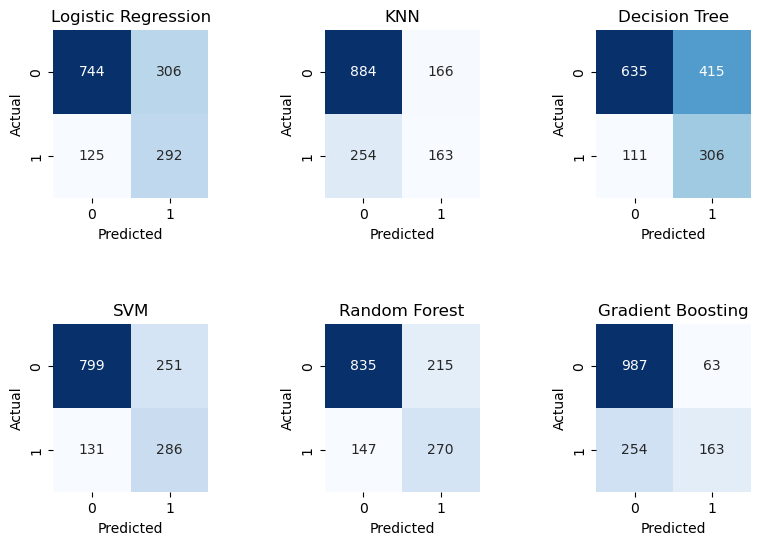

In [97]:
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
axes = axes.flatten()

for idx, result in enumerate(balanced_results):
    model_name = result['Model']
    confusion_mat = result['Confusion Matrix']

    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx])
    axes[idx].set_title(f"{model_name}")
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.subplots_adjust(hspace=0.75)
plt.subplots_adjust(wspace=0.75)

plt.show()

In [98]:
pd.set_option('display.max_colwidth', None)
best_params_df = pd.DataFrame(best_params_results)
best_params_df

,Model,Best Params
0,Logistic Regression,"{'C': 0.01, 'max_iter': 100}"
1,KNN,"{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}"
2,Decision Tree,"{'max_depth': 5, 'min_samples_split': 10}"
3,SVM,"{'C': 1, 'kernel': 'rbf'}"
4,Random Forest,"{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}"
5,Gradient Boosting,"{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 25}"


## Model Interpretation

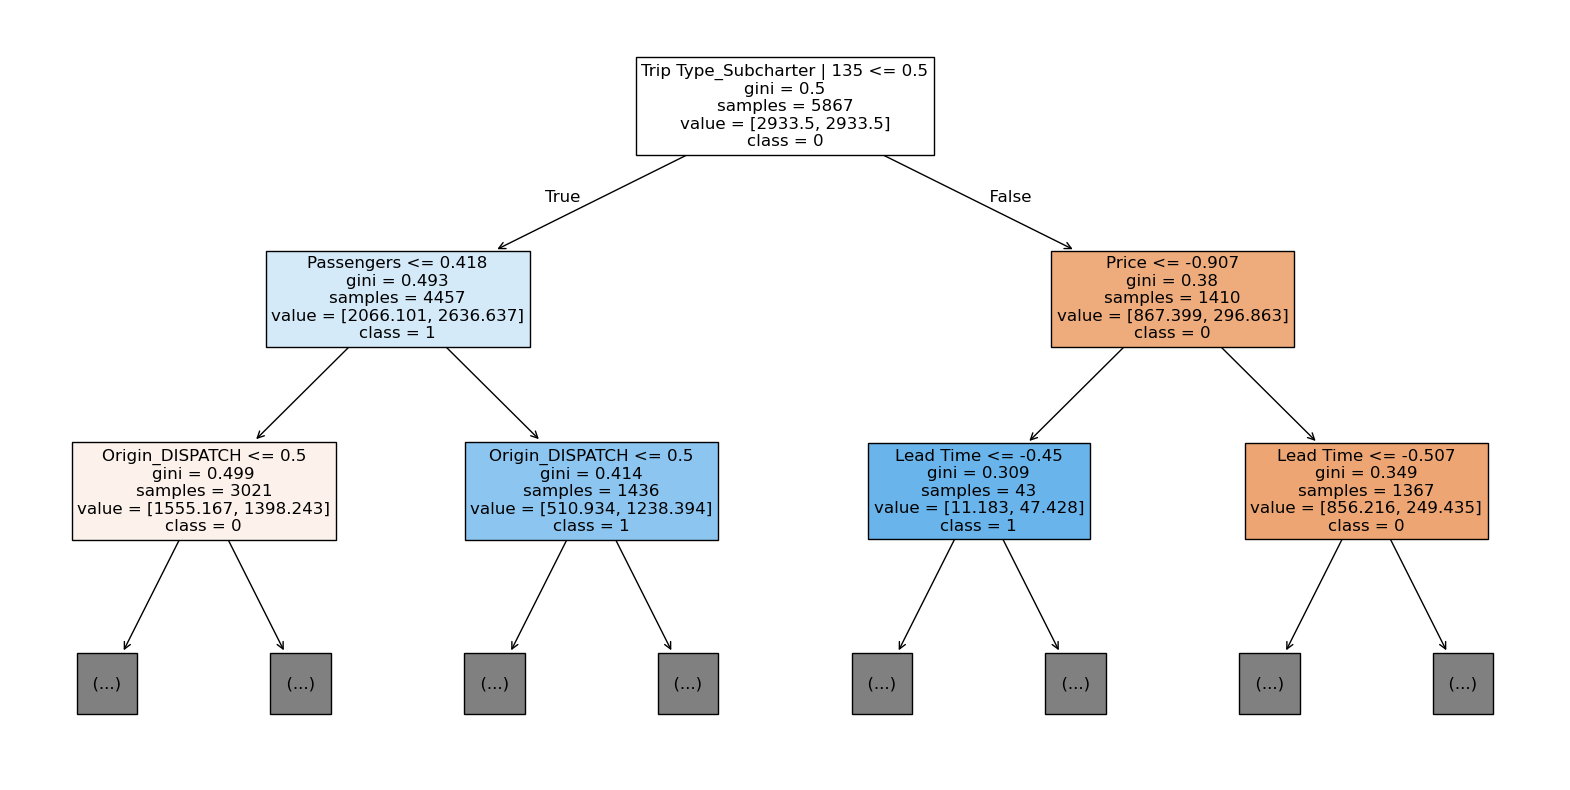

In [99]:
tree = DecisionTreeClassifier(random_state = 4, class_weight = 'balanced', max_depth = 5, min_samples_split = 10)
tree.fit(X_train_processed_df, y_train)

plt.figure(figsize = (20,10))
plot_tree(tree, filled = True, feature_names = X_train_processed_df.columns, class_names=[str(x) for x in tree.classes_], max_depth = 2, fontsize = 12)
plt.show()

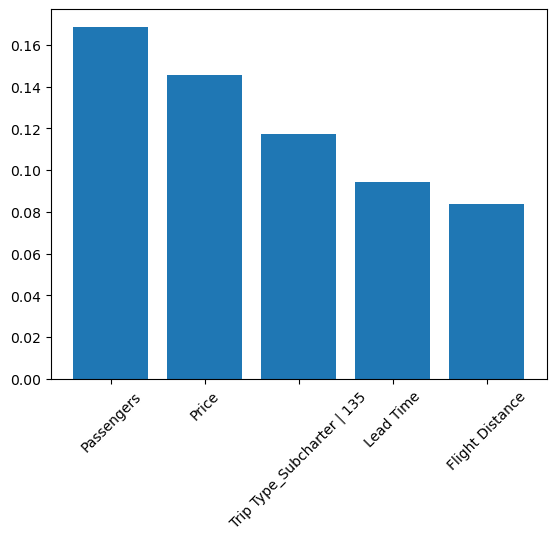

In [100]:
forest = RandomForestClassifier(random_state = 4, class_weight = 'balanced', max_depth = 10, min_samples_split = 10, n_estimators = 100)
forest.fit(X_train_processed_df, y_train)

feature_importances = forest.feature_importances_
indices = np.argsort(feature_importances)[::-1][:5]

plt.figure()
plt.bar(range(5), feature_importances[indices])
plt.xticks(range(5), X_train_processed_df.columns[indices], rotation = 45)
plt.show();

Both of our tree based models (Decision Tree and Random Forest) with their best parameters showed that in terms of feature importance, the top 3 features it used were the number of passengers on the trip, the price of the trip, and whether the trip was a subcharter or not.

In [101]:
%%capture
!pip install shap

In [102]:
import shap

In [103]:
lgr = LogisticRegression(random_state = 4, class_weight = 'balanced', C = 0.01, max_iter = 100).fit(X_train_processed_df, y_train)
lgr_train_preds = lgr.predict(X_train_processed_df)
lgr_test_preds = lgr.predict(X_test_processed_df)

In [104]:
lgr_coefs = pd.DataFrame({'columns': X_train_processed_df.columns.tolist(), 'coefs': lgr.coef_[0]}).sort_values(by = 'coefs')
top_5_negative_coefs = lgr_coefs.head()
top_5_positive_coefs = lgr_coefs.tail()
top_10_coefs = pd.concat([top_5_negative_coefs, top_5_positive_coefs])
top_10_coefs

,columns,coefs
4,Trip Type_Subcharter | 135,-0.74
6,Origin_EMAIL,-0.34
1,Price,-0.30
38,Customer Segment_Wholesale,-0.16
11,Manufacturer_Dassault,-0.14
0,Lead Time,0.18
2,Flight Distance,0.32
36,Customer Segment_New Retail,0.36
3,Passengers,0.40
5,Origin_DISPATCH,0.57


In [105]:
explainer = shap.LinearExplainer(lgr, X_train_processed_df)
shap_values = explainer.shap_values(X_test_processed_df)

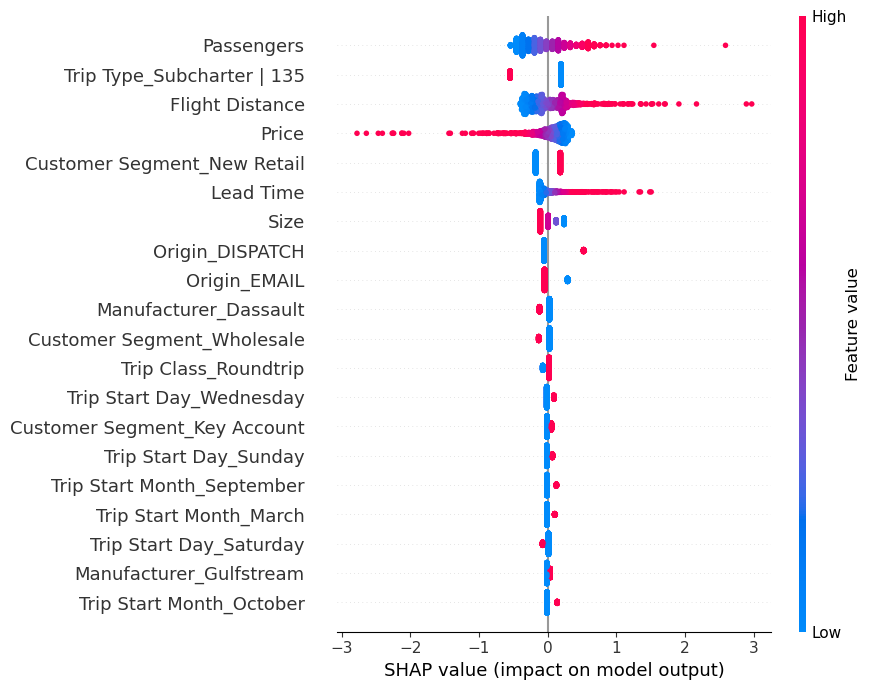

In [106]:
shap.summary_plot(shap_values, X_test_processed_df, plot_size = (9,7))

The SHAP plot of the logistic regression model with best parameters highlights some very important findings:
- The most important feature was the number of passengers. The SHAP plot shows that higher numbers of passengers increase the likelihood of cancellation.
- Subcharter 135 trips decrease the likelihood of cancellation.
- Longer flight distance trips have a higher likelihood of cancellation.
- Higher priced trips have a lower likelihood of cancellation.
- Longer lead times have a higher likelihood of cancellation. 

## EDA on Results & Filtered Model Attempt

During the EDA phase and looking at the feature importances above, we saw that subcharter trips have a lower cancellation rate than charter trips. And in terms of the practical business use case of this model, predicting cancellation for charter trips is more important than subcharter trips because subcharter trips essentially mean the company is fulfilling the client's trip with another third party's aircraft.

So let's try to train and evaluate another machine learning model on a filtered version of the data that only includes the Charter | 135 trip type, and see if there is any difference in model performance.

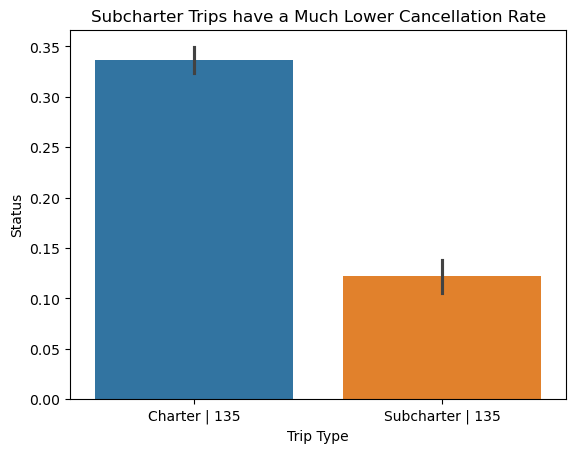

In [107]:
sns.barplot(data = df, x = 'Trip Type', y = 'Status', hue = 'Trip Type')
plt.title('Subcharter Trips have a Much Lower Cancellation Rate')
plt.show;

In [108]:
df_on_fleet = df[df['Trip Type'] == 'Charter | 135']
df_on_fleet.drop('Trip Type', axis = 1, inplace = True)

In [109]:
X = df_on_fleet.drop(columns = 'Status')
y = df_on_fleet['Status']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 4)

In [111]:
num_features = X.select_dtypes(['int', 'float']).columns.tolist()
cat_features = X.select_dtypes('object').drop(columns = ['Size','Customer Segment']).columns.tolist()
aircraft_size = 'Size'
customer_segment = 'Customer Segment'

In [112]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), num_features), # scale numerical features
        
        ('cat', Pipeline(steps = [
            ('imputer', SimpleImputer(strategy = 'most_frequent')), # impute missing values with most frequent value (mode)
            ('ohe', OneHotEncoder(drop = 'first', sparse_output = False)) # one hot encode categorical features
        ]), cat_features),

        ('aircraft size', OrdinalEncoder(categories = [['Light', 'Mid-Size', 'Super Mid-Size', 'Large']]), [aircraft_size]), # ordinal encode the Size feature in order

        ('customer_segment', Pipeline(steps = [
            ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'New Retail')), # impute missing values as New Retail as that would be a new customer
            ('ohe', OneHotEncoder(drop = 'first', sparse_output = False))
        ]), [customer_segment])
    ])

In [113]:
X_train_on_fleet = preprocessor.fit_transform(X_train)
X_test_on_fleet = preprocessor.transform(X_test)

In [114]:
cat_features_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
customer_segment_columns = preprocessor.named_transformers_['customer_segment'].get_feature_names_out([customer_segment])

In [115]:
X_train_on_fleet_df = pd.DataFrame(X_train_on_fleet, columns = list(num_features) + list(cat_features_columns) + list([aircraft_size]) + list(customer_segment_columns))
X_test_on_fleet_df = pd.DataFrame(X_test_on_fleet, columns = list(num_features) + list(cat_features_columns) + list([aircraft_size]) + list(customer_segment_columns))

In [116]:
grid_results = []
best_params_results = []

for model_name, model in balanced_models.items():

    grid_search = GridSearchCV(model, param_grid = param_grid[model_name], cv = 5, n_jobs = -1, scoring = 'f1')
    start = time.time()
    grid_search.fit(X_train_on_fleet_df, y_train)
    end = time.time()
    train_time = end - start
    
    model_train_preds = grid_search.predict(X_train_on_fleet_df)
    model_test_preds = grid_search.predict(X_test_on_fleet_df)
    
    model_train_accuracy = metrics.accuracy_score(y_train, model_train_preds)
    model_train_precision = metrics.precision_score(y_train, model_train_preds)
    model_train_recall = metrics.recall_score(y_train, model_train_preds)
    model_train_f1 = metrics.f1_score(y_train, model_train_preds)
    
    model_test_accuracy = metrics.accuracy_score(y_test, model_test_preds)
    model_test_precision = metrics.precision_score(y_test, model_test_preds)
    model_test_recall = metrics.recall_score(y_test, model_test_preds)
    model_test_f1 = metrics.f1_score(y_test, model_test_preds)
    
    grid_results.append({
        'Model': model_name,
        'Train Time': round(train_time, 4),
        'Train Accuracy': model_train_accuracy,
        'Test Accuracy': model_test_accuracy,
        'Train Precision': model_train_precision,
        'Test Precision': model_test_precision,
        'Train Recall': model_train_recall,
        'Test Recall': model_test_recall,
        'Train F1': model_train_f1,
        'Test F1': model_test_f1
    })

    best_params_results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_
    })

In [117]:
grid_results_df = pd.DataFrame(grid_results)
grid_results_df.sort_values(by = 'Test F1', ascending = False)

,Model,Train Time,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
4,Random Forest,11.81,0.82,0.75,0.73,0.63,0.72,0.60,0.72,0.62
0,Logistic Regression,1.31,0.69,0.69,0.54,0.54,0.65,0.65,0.59,0.59
3,SVM,24.99,0.76,0.71,0.64,0.57,0.68,0.60,0.66,0.59
2,Decision Tree,0.73,0.73,0.71,0.60,0.57,0.57,0.53,0.58,0.55
5,Gradient Boosting,12.00,0.83,0.75,0.91,0.73,0.56,0.41,0.69,0.53
1,KNN,2.25,1.00,0.71,1.00,0.61,1.00,0.41,1.00,0.49


As we can see, model performance didn't really change after filtering the dataset to only include the Charter | 135 trip type.

In [118]:
pd.set_option('display.max_colwidth', None)
best_params_df = pd.DataFrame(best_params_results)
best_params_df

,Model,Best Params
0,Logistic Regression,"{'C': 0.1, 'max_iter': 100}"
1,KNN,"{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}"
2,Decision Tree,"{'max_depth': 5, 'min_samples_split': 10}"
3,SVM,"{'C': 1, 'kernel': 'rbf'}"
4,Random Forest,"{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}"
5,Gradient Boosting,"{'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 25}"
